In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin
%matplotlib inline

In [2]:
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=1.0, random_state=18)

In [3]:
k = 3
rng = np.random.RandomState(18)
initial_centroids = X[rng.choice(X.shape[0], k, replace=False)]

In [ ]:
initial_centroids

In [4]:
centroids = initial_centroids
iterations = [centroids.copy()]

In [8]:
for i in range(5):
    labels = pairwise_distances_argmin(X, centroids)
    new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
    iterations.append(new_centroids.copy())
    if np.all(centroids == new_centroids):
        break
    centroids = new_centroids

/var/folders/5g/d5t9nrnd47z7b7djysv3l9mm0000gq/T/ipykernel_31164/4200383616.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figs[0].show()
/var/folders/5g/d5t9nrnd47z7b7djysv3l9mm0000gq/T/ipykernel_31164/4200383616.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figs[-1].show()


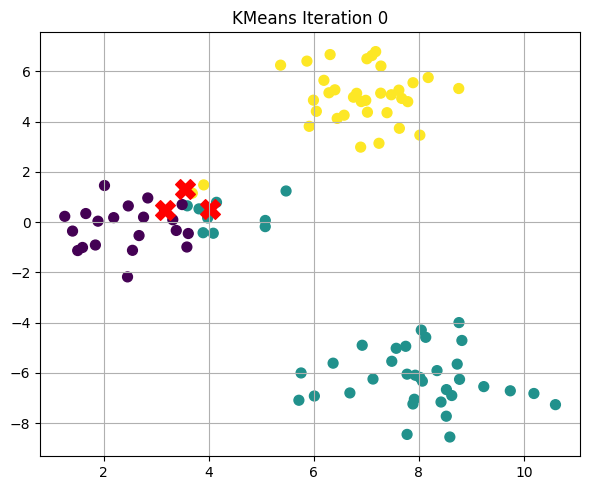

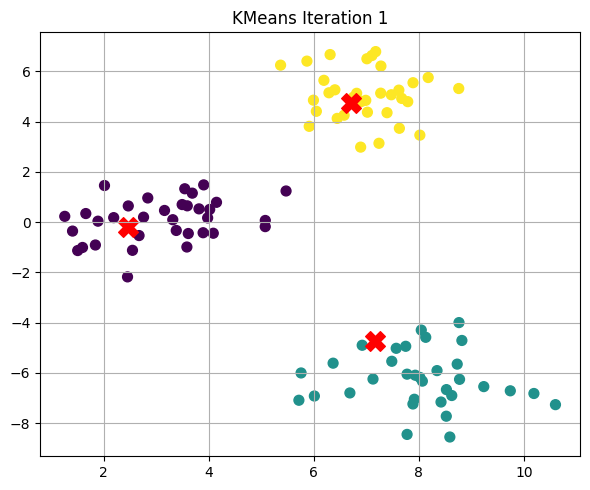

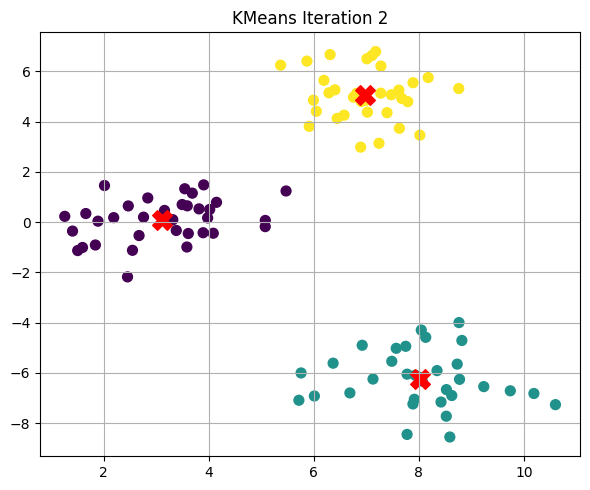

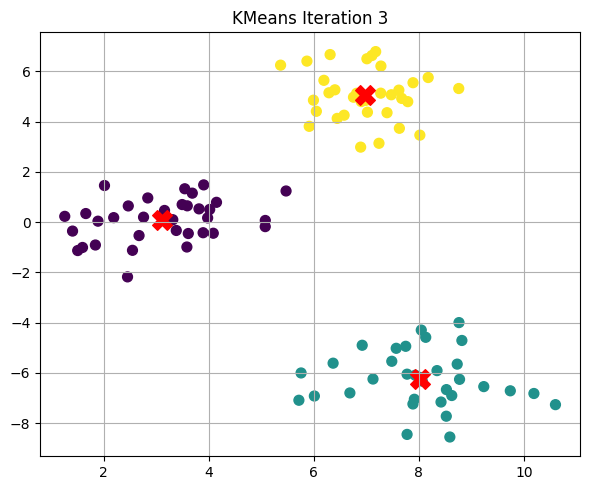

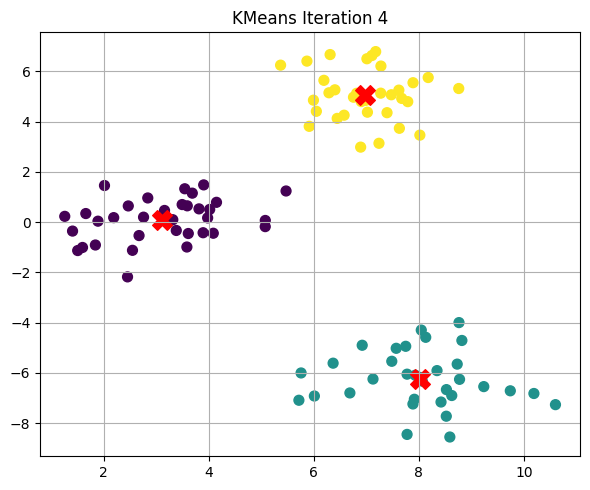

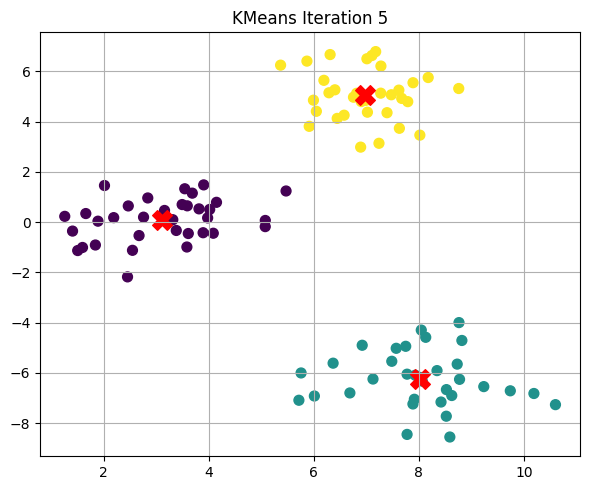

In [9]:
figs = []
for i, cent in enumerate(iterations):
    plt.figure(figsize=(6, 5))
    labels = pairwise_distances_argmin(X, cent)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
    plt.scatter(cent[:, 0], cent[:, 1], c='red', s=200, marker='X')
    plt.title(f"KMeans Iteration {i}")
    plt.grid(True)
    plt.tight_layout()
    figs.append(plt.gcf())
    # plt.close()

figs[0].show()
figs[-1].show()